<a href="https://colab.research.google.com/github/MolkaHaddar/Task-1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP:The Sparks Foundation**

**Data Science & Business Analytics intern**

**Author:Molka Haddar**

**Task1:Prediction Using Supervised ML**

*In this task we predict the percentage of an student based on the no. of study hours.The task has two variables and this can be solved using simple linear regression*

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Reading data
url="https://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


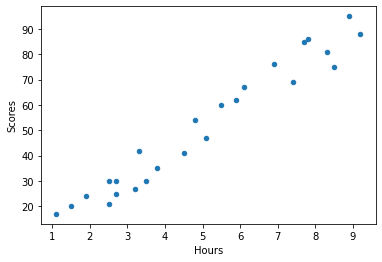

In [6]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [7]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
Hours=data['Hours']
scores=data['Scores']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


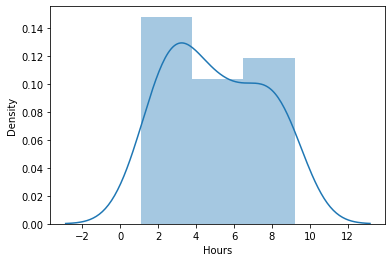

In [11]:
sns.distplot(Hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


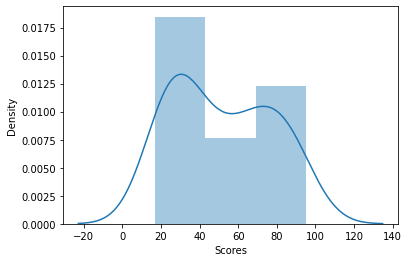

In [13]:
sns.distplot(scores)

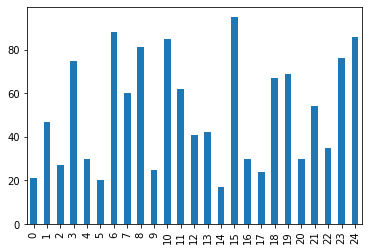

In [18]:
scores.plot(kind='bar')
plt.show()

**Prepocessing**

In [14]:
X=data.iloc[:,:-1].values
y=data.iloc[:, 1].values

**Training**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)


In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

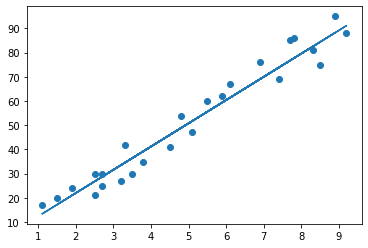

In [19]:
m=reg.coef_
c=reg.intercept_
s=m*X+c
plt.scatter(X,y)
plt.plot(X,s);
plt.show()

**Predictions**

In [20]:
y_pred= reg.predict(X_test)

In [21]:
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff

,Actual value,Predicted value
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


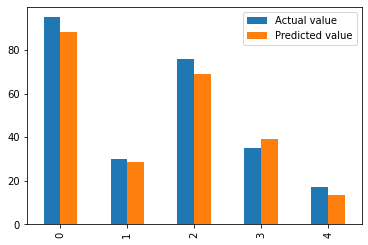

In [22]:
diff.plot(kind='bar')
plt.show()

What is the predicted score if a student studies for 9.25 hours/day

In [23]:
hours=9.25
pred=reg.predict(np.array(hours).reshape(1,-1))
print("Prediction=",pred[0])

Prediction= 91.56986604454478


**Model** **Evaluation**

In [24]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(reg.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.21
Mean Absolute Error: 4.5916495300630285
Mean Square Error: 25.584078296539932
Root Mean Square Error: 5.058070610078504
